In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# 1 - Analyse Descriptive

In [3]:
df = pd.read_csv("Birthweight.csv")

df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [4]:
df.shape

(42, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   Length       42 non-null     int64  
 2   Birthweight  42 non-null     float64
 3   Headcirc     42 non-null     int64  
 4   Gestation    42 non-null     int64  
 5   smoker       42 non-null     int64  
 6   mage         42 non-null     int64  
 7   mnocig       42 non-null     int64  
 8   mheight      42 non-null     int64  
 9   mppwt        42 non-null     int64  
 10  fage         42 non-null     int64  
 11  fedyrs       42 non-null     int64  
 12  fnocig       42 non-null     int64  
 13  fheight      42 non-null     int64  
 14  lowbwt       42 non-null     int64  
 15  mage35       42 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 5.4 KB


In [4]:
df.describe().apply(lambda x: x.round(2))

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.00,42.00,42.00,42.0,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.0
mean,894.07,51.33,3.31,34.6,39.19,0.52,25.55,9.43,164.45,57.50,28.90,13.67,17.19,180.50,0.14,0.1
std,467.62,2.94,0.60,2.4,2.64,0.51,5.67,12.51,6.50,7.20,6.86,2.16,17.31,6.98,0.35,0.3
min,27.00,43.00,1.92,30.0,33.00,0.00,18.00,0.00,149.00,45.00,19.00,10.00,0.00,169.00,0.00,0.0
25%,537.25,50.00,2.94,33.0,38.00,0.00,20.25,0.00,161.00,52.25,23.00,12.00,0.00,175.25,0.00,0.0
50%,821.00,52.00,3.30,34.0,39.50,1.00,24.00,4.50,164.50,57.00,29.50,14.00,18.50,180.50,0.00,0.0
75%,1269.50,53.00,3.65,36.0,41.00,1.00,29.00,15.75,169.50,62.00,32.00,16.00,25.00,184.75,0.00,0.0
max,1764.00,58.00,4.57,39.0,45.00,1.00,41.00,50.00,181.00,78.00,46.00,16.00,50.00,200.00,1.00,1.0


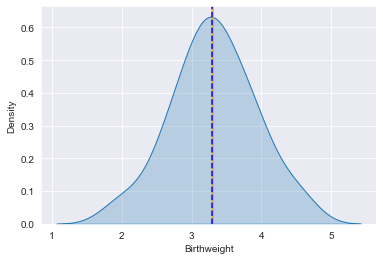

In [5]:
sns.set_style("darkgrid") 
sns.kdeplot(df.Birthweight, fill = True)
plt.axvline(x=df.Birthweight.mean(),
            color='orange')
plt.axvline(x=df.Birthweight.median(),
            color='blue', ls = "--")

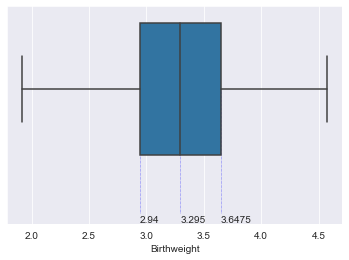

In [6]:
sns.boxplot(x=df.Birthweight)
quantiles = [df.Birthweight.quantile(0.25), df.Birthweight.quantile(0.5), df.Birthweight.quantile(0.75)]
plt.gca().vlines(quantiles, 0, 0.75, color='b', ls=':', lw=0.5, zorder=0)
for q in quantiles:
    plt.gca().annotate(q, xy=(q, 0.8))

<AxesSubplot:>

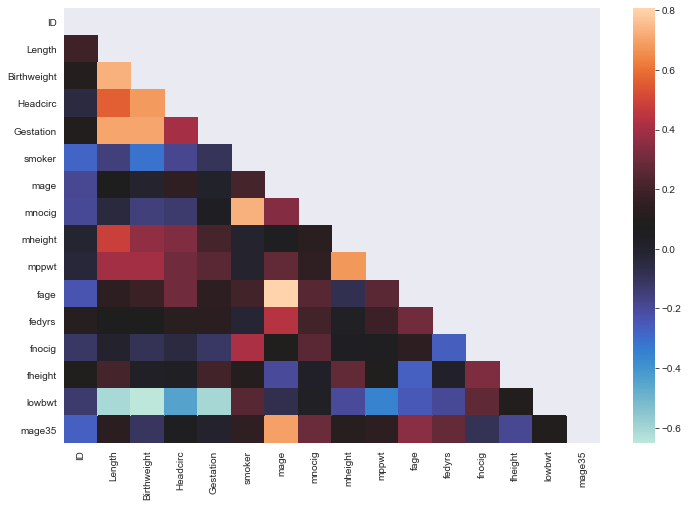

In [7]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), mask=np.triu(df.corr()), cmap="icefire")

In [8]:
print(df.corr().Birthweight.sort_values().head(3),"\n\n", df.corr().Birthweight.sort_values()[-5:-1])

lowbwt   -0.651964
smoker   -0.314234
mnocig   -0.152335
Name: Birthweight, dtype: float64 

 mppwt        0.400886
Headcirc     0.684616
Gestation    0.708303
Length       0.726833
Name: Birthweight, dtype: float64


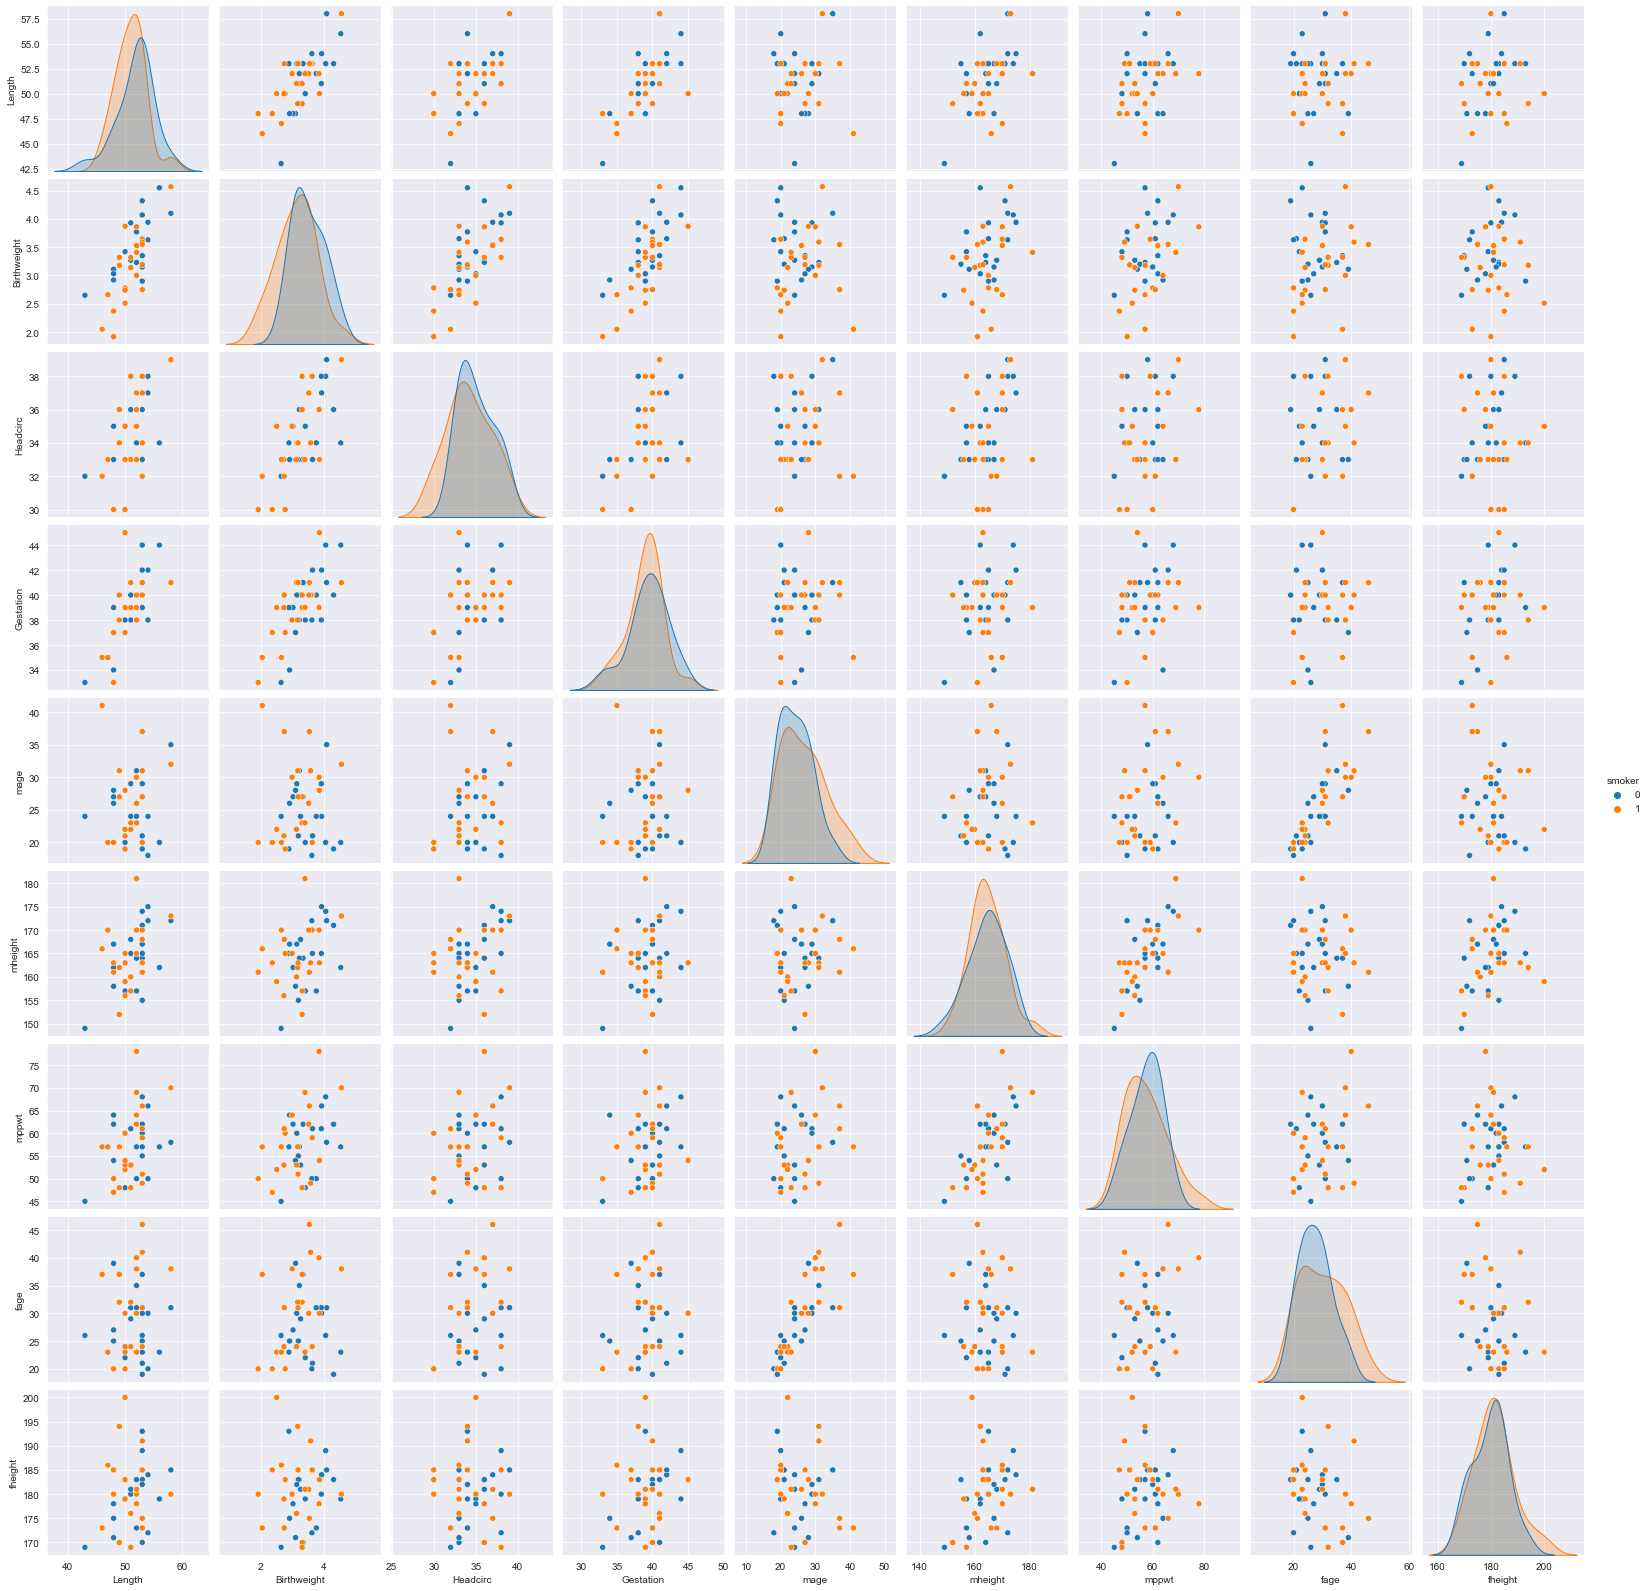

In [9]:
sns.pairplot(data=df[['Length', 'Birthweight', 'Headcirc', 'Gestation',
       'mage', 'mheight', 'mppwt', 'fage',
       'fheight', "smoker"]], hue="smoker")

# 2 - Features Engineering

In [10]:
def convertorGestationToRatio(x):
    if x <= 34:
        return 1.04
    elif x <= 36:
        return 1.02
    elif x <= 38:
        return 0.98
    elif x <= 40:
        return 0.97
    else:
        return 0.96
        
df["mppIMC"] = df.mppwt / (df.mheight/100)**2
df["IMC"] = df.Birthweight / (df.Length/100)**2
df["CircRatio"] = df.Gestation.apply(lambda x: convertorGestationToRatio(x))
df["Abdominalcirc"] = df.Headcirc*df["CircRatio"]
df["LengthRatio"] = df.Length / (df.mheight+df.fheight)

# 3 - Test de Student

### Two Sample T-Test: Comparer le poids des enfants entre ceux dont la mère fume et les autres.

Null Hypothesis (H0): Les bébés des mères fumeuses pèsent le même poids que les autres.

Alternative Hypothesis (H1): Les bébés des mères fumeuses ne pèsent pas le même poids que les autres.

Significativité (alpha) : 5%.

In [11]:
nonsmoker_birthweight= df.loc[df['smoker']==0]['Birthweight']
smoker_birthweight= df.loc[df['smoker']==1]['Birthweight']

print("Non-smoker variance: " + str(np.var(nonsmoker_birthweight)) + "\nSmoker variance: " + str(np.var(smoker_birthweight)))

Non-smoker variance: 0.25539475
Smoker variance: 0.3803605371900828


In [12]:
stats.ttest_ind(smoker_birthweight, nonsmoker_birthweight, equal_var=True)

Ttest_indResult(statistic=-2.093431541991207, pvalue=0.04269624654559367)

La p-value est inférieure à 5% donc on rejette l'hypothèse nulle avec un intervalle de confiance de 95%. Les bébés des mères fumeuses ne pèsent pas le même poids que les autres.

### Nous allons maintenant vérifier si les bébés de mères fumeuses pèsent moins que les autres

Null Hypothesis (H0): Les bébés des mères fumeuses pèsent autant que les autres.

Alternative Hypothesis (H1): Les bébés des mères fumeuses pèsent moins que les autres.

Significativité (alpha) : 5%.

In [13]:
stats.ttest_ind(smoker_birthweight, nonsmoker_birthweight, alternative = "less", equal_var=True)

Ttest_indResult(statistic=-2.093431541991207, pvalue=0.021348123272796834)

La p-value est inférieure à 5% donc on rejette l'hypothèse nulle avec un intervalle de confiance de 95%. Les bébés des mères fumeuses pèsent moins que les autres.

### Nous effectuons les mêmes tests en fonction de l'age de la mère.

Null Hypothesis (H0): Les bébés des mères qui ont plus de 35 ans pèsent autant que les autres.

Alternative Hypothesis (H1): Les bébés des mères de plus de 35 ans ne pèsent pas autant que les autres.

Significativité (alpha) : 5%.

In [37]:
under35_birthweight= df.loc[df['mage35']==0]['Birthweight']
over35_birthweight= df.loc[df['mage35']==1]['Birthweight']

print("Under 35 variance: " + str(np.var(under35_birthweight)) + "\nOver 35 variance: " + str(np.var(over35_birthweight)))

Under 35 variance: 0.32494494459833806
Over 35 variance: 0.6067187499999999


In [43]:
stats.ttest_ind(over35_birthweight, under35_birthweight, equal_var=False)

Ttest_indResult(statistic=-0.4820663094453986, pvalue=0.6602415831088149)

La p-value est supérieure à 5% donc on ne peut pas rejetter l'hypothèse nulle avec un intervalle de confiance de 95%. Les bébés des mères qui ont plus de 35 ans pèsent probablement autant que les autres.

# 4 - Test de Chi-Square

Null Hypothesis (H0): Avoir une mère fumeuse et avoir un faible poids à la naissance sont deux variables indépendantes.

Alternative Hypothesis (H1): Avoir une mère fumeuse et avoir un faible poids à la naissance sont deux variables dépendantes.

Significativité (alpha) : 5%.

In [14]:
cont_table = pd.crosstab(index=df['smoker'], columns=df['lowbwt'], margins=False)

<AxesSubplot:xlabel='lowbwt', ylabel='smoker'>

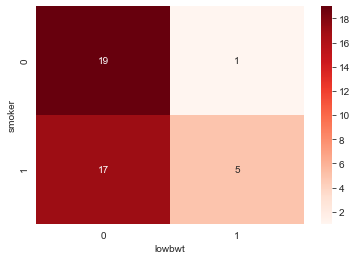

In [15]:
sns.heatmap(cont_table, annot=True, cmap="Reds")

In [16]:
c, p, dof, expected = stats.chi2_contingency(cont_table) 
p

0.23082094094618558

La p-value est supérieure à 5% donc on ne peut pas rejeter l'hypothèse nulle avec un intervalle de confiance de 95%. Avoir une mère fumeuse et avoir un faible poids à la naissance sont probablement deux variables indépendantes.

### Nous effectuons les mêmes tests en fonction de l'age de la mère.

Null Hypothesis (H0): Avoir une mère de plus de 35 ans et avoir un faible poids à la naissance sont deux variables indépendantes.

Alternative Hypothesis (H1): Avoir une mère de plus de 35 ans et avoir un faible poids à la naissance sont deux variables dépendantes.

Significativité (alpha) : 5%.

<AxesSubplot:xlabel='lowbwt', ylabel='mage35'>

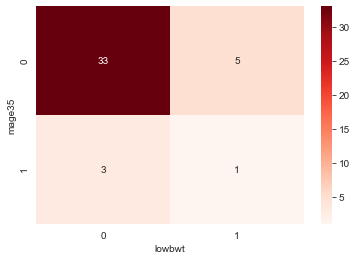

In [47]:
cont_table = pd.crosstab(index=df['mage35'], columns=df['lowbwt'], margins=False)
sns.heatmap(cont_table, annot=True, cmap="Reds")

In [48]:
c, p, dof, expected = stats.chi2_contingency(cont_table) 
p

0.9145514728939474

La p-value est supérieure à 5% donc on ne peut pas rejeter l'hypothèse nulle avec un intervalle de confiance de 95%. Avoir une mère ayant plus de 35 ans et avoir un faible poids à la naissance sont probablement deux variables indépendantes.

# 5 - Test de Normalité

Null Hypothesis (H0): Le poids à la naissance suit une distribution normale.

Alternative Hypothesis (H1): Le poids à la naissance ne suit pas une distribution normale.

Significativité (alpha) : 5%.

In [17]:
#Test de normalité - Agostino
stats.normaltest(df['Birthweight'])

NormaltestResult(statistic=0.1049044833363354, pvalue=0.9488996378374451)

In [18]:
#Test de Normalité - Shapiro-Wilks
stats.shapiro(df['Birthweight'])

ShapiroResult(statistic=0.9899008274078369, pvalue=0.9684654474258423)

In [19]:
#Test de normalité – Kolmogorov-Smirnov
normed_data = (df['Birthweight']-np.mean(df['Birthweight']))/np.std(df['Birthweight'])

stats.kstest(normed_data, 'norm')

KstestResult(statistic=0.057409567686096064, pvalue=0.9977603564234541)

Dans tous les cas, la p-value est supérieure à 5% donc on ne peut pas rejeter l'hypothèse nulle avec un intervalle de confiance de 95%. Le poids à la naissance suit probablement une distribution normale.

In [49]:
stats.normaltest(df['mnocig'])

NormaltestResult(statistic=14.17450709587283, pvalue=0.000835689397558462)

Dans le cas du nombre de cigarettes fumées par jour par la mère, la p-value est inférieure à 5% donc rejetons l'hypothèse nulle avec un intervalle de confiance de 95%. Le nombre de cigarettes fumées par la mère par jour ne suit pas une distribution normale.

# 6 - Régression Linéaire

In [20]:
# On créé et entraine notre modèle
lm = smf.ols(formula='Birthweight ~ smoker + Gestation + Headcirc', data=df).fit()

lm.params

Intercept   -5.013700
smoker      -0.220543
Gestation    0.116775
Headcirc     0.111738
dtype: float64

In [21]:
# On étudie l'intervalle de confiance (95%) dans lequel on estime que le vrai coefficient se trouve
lm.conf_int()

,0,1
Intercept,-6.880860,-3.146541
smoker,-0.430233,-0.010853
Gestation,0.073665,0.159885
Headcirc,0.063656,0.159820


In [22]:
# Les valeurs p des coefficients
lm.pvalues

Intercept    0.000003
smoker       0.039779
Gestation    0.000003
Headcirc     0.000033
dtype: float64

In [23]:
lm.rsquared

0.7240428121413778

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Birthweight   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     33.23
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.02e-10
Time:                        14:34:04   Log-Likelihood:                -10.869
No. Observations:                  42   AIC:                             29.74
Df Residuals:                      38   BIC:                             36.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0137      0.922     -5.436      0.000      -6.881      -3.147
smoker        -0.2205      0.104     -2.129      0.040      -0.430      -0.011
Gestation      0.1168      0.021      5.484      0.000       0.074       0.160
Headcirc       0.1117      0.024      4.705      0.000       0.064       0.160
==============================================================================
Omnibus:                        0.726   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.744
Skew:                           0.286   Prob(JB):                        0.689
Kurtosis:                       2.688   Cond. No.                         950.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x, y = df[["smoker", "Gestation", "Headcirc"]], df[["Birthweight"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size= 0.3)

In [26]:
model = LinearRegression().fit(train_x, train_y)
print(model.intercept_)
print(model.coef_[0])
model.score(test_x, test_y)

[-6.01678032]
[-0.2757092   0.14107907  0.11470096]


0.3851477318088973

In [27]:
predictions = model.predict(test_x)
preds = []
for prediction in predictions:
    preds.append(prediction[0])

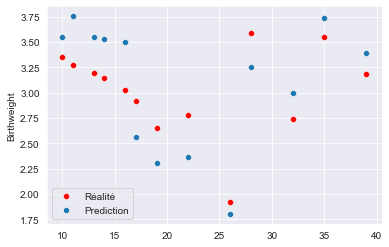

In [28]:
sns.scatterplot(x=test_y.index, y=test_y.Birthweight,color="red")
sns.scatterplot(x=test_x.index, y=preds)
plt.legend(["Réalité", "Prediction"])

[12.7178804]
[0.2357164]
0.0371472653023166


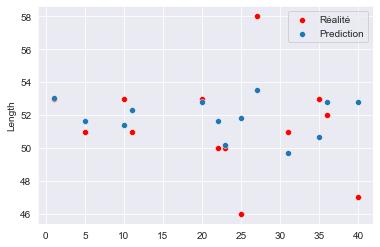

In [78]:
x, y = df[["mheight"]], df[["Length"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size= 0.3)
model = LinearRegression().fit(train_x, train_y)
print(model.intercept_)
print(model.coef_[0])
print(model.score(test_x, test_y))
predictions = model.predict(test_x)
preds = []
for prediction in predictions:
    preds.append(prediction[0])
sns.scatterplot(x=test_y.index, y=test_y.Length,color="red")
sns.scatterplot(x=test_x.index, y=preds)
plt.legend(["Réalité", "Prediction"])

[-3.13279251]
[0.16449298]
0.6300274466205196


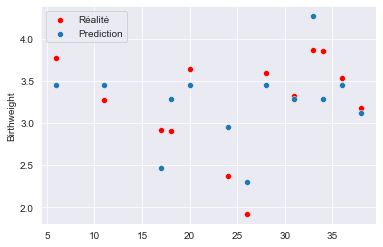

In [77]:
x, y = df[["Gestation"]], df[["Birthweight"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size= 0.3)
model = LinearRegression().fit(train_x, train_y)
print(model.intercept_)
print(model.coef_[0])
print(model.score(test_x, test_y))
predictions = model.predict(test_x)
preds = []
for prediction in predictions:
    preds.append(prediction[0])
sns.scatterplot(x=test_y.index, y=test_y.Birthweight,color="red")
sns.scatterplot(x=test_x.index, y=preds)
plt.legend(["Réalité", "Prediction"])

[35.20600444]
[-0.97810494]
0.8461538461538461


C:\Users\dumon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


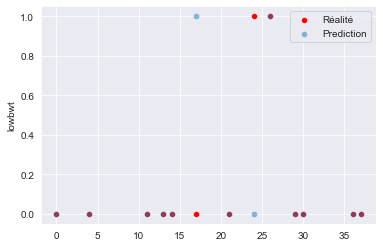

In [85]:
x, y = df[["Gestation"]], df[["lowbwt"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size= 0.3)
model = LogisticRegression().fit(train_x, train_y)
print(model.intercept_)
print(model.coef_[0])
print(model.score(test_x, test_y))
predictions = model.predict(test_x)
preds = []
for prediction in predictions:
    preds.append(prediction)
sns.scatterplot(x=test_y.index, y=test_y.lowbwt,color="red")
sns.scatterplot(x=test_x.index, y=preds, alpha=0.5)
plt.legend(["Réalité", "Prediction"])

# 7 - Clustering

In [29]:
X = (x-x.mean())/x.std()
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df_pca = pd.DataFrame(components,columns=['pca_1','pca_2'])
df_pca.head(5)

,pca_1,pca_2
0,-1.381347,0.277173
1,-0.980449,0.739447
2,-2.062335,0.409885
3,-2.503245,0.032609
4,-1.741847,0.386028


In [30]:
max_k = 15
km_scores= []
for i in range(2,max_k):
    km = KMeans(n_clusters=i).fit(X)
    preds = km.predict(X)
    km_scores.append(-km.score(X))

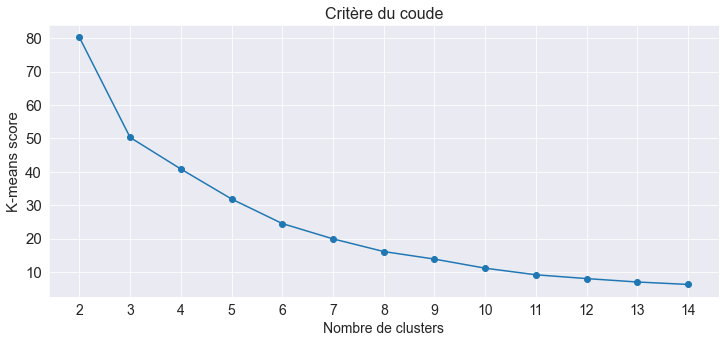

In [31]:
plt.figure(figsize=(12,5))
plt.title("Critère du coude",fontsize=16)
plt.plot([i for i in range(2,max_k)],km_scores, marker = 'o')
plt.grid(True)
plt.xlabel("Nombre de clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,max_k)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [32]:
K = 2
clf = KMeans(n_clusters=K)

In [33]:
clf.fit(X)
predict_clf = clf.predict(X)

Text(0.5, 1.0, 'Prédiction des clusters')

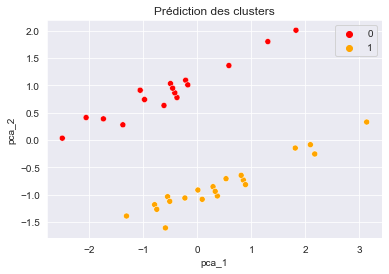

In [94]:
sns.scatterplot(x=df_pca["pca_1"], y=df_pca["pca_2"], hue=predict_clf, palette={1:"orange", 2:"yellow", 0:"red"})
plt.title("Prédiction des clusters")

Text(0.5, 1.0, 'Clusters mère fumeuse/non-fumeuse')

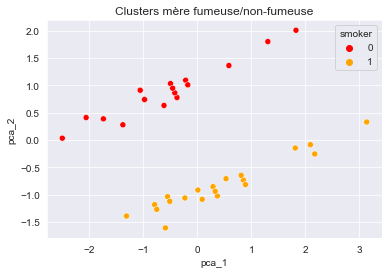

In [92]:
sns.scatterplot(x=df_pca["pca_1"], y=df_pca["pca_2"], hue=df.smoker, palette={1:"orange", 2:"yellow", 0:"red"})
plt.title("Clusters mère fumeuse/non-fumeuse")

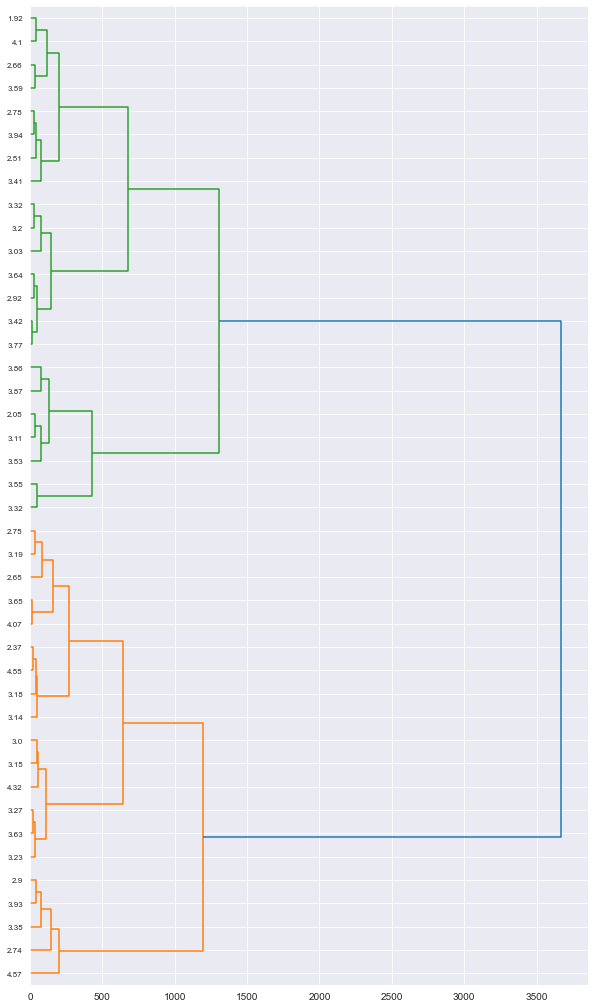

In [36]:
df["bwtasstr"] = df.Birthweight.astype(str).values
Z = linkage(df.drop(columns="bwtasstr"), method='ward', metric='euclidean')
plt.figure(figsize=(10,18))
dendrogram(Z,orientation='right',leaf_font_size=8,color_threshold="default",labels=df.bwtasstr.str.strip().values)
plt.show()